### Fruit Colour Prediction with Random Forest

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Loading the dataset
dataset = "/Users/morrisonosiezagha/Downloads/fruit_dataset.csv"

# Reading in the dataset with pandas
df_fruitdata = pd.read_csv(dataset )

In [4]:
# Examining the dataset
df_fruitdata.head() # viewing the first five rows

,Fruit,Size (cm),"Color (1 = Red, 0 = Green)"
0,Apple,11,1
1,Apple,14,0
2,Orange,12,0
3,Pear,13,0
4,Pear,9,0


In [5]:
# Examining the dataset
df_fruitdata.isnull().sum() # checking for null entries

Fruit                         0
Size (cm)                     0
Color (1 = Red, 0 = Green)    0
dtype: int64

In [6]:
# df_fruitdata.duplicated().sum()
# df_fruitdata.drop_duplicates(inplace=True)

In [7]:
# Examining the dataset
df_fruitdata.info() # checking the dtype of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Fruit                       100 non-null    object
 1   Size (cm)                   100 non-null    int64 
 2   Color (1 = Red, 0 = Green)  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


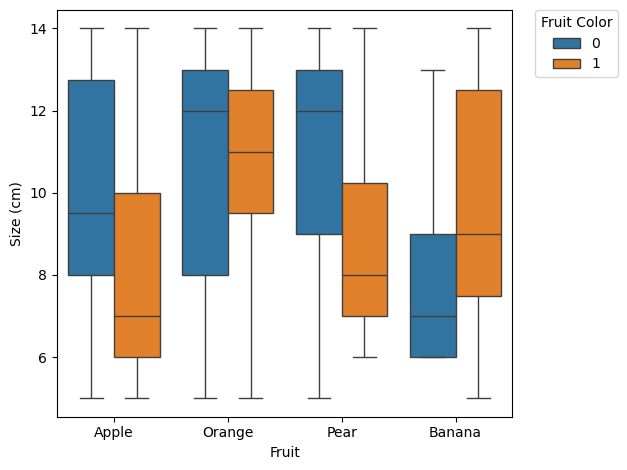

In [8]:
# Examining the dataset by visualizing the variable distributions
sns.boxplot(data=df_fruitdata, y="Size (cm)", hue="Color (1 = Red, 0 = Green)", x="Fruit")
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
legend.set_title("Fruit Color")  # Set the title of the legend
plt.tight_layout()  # Adjust layout
plt.show()

In [9]:
# Importing Label Encoder to convert strings to int i.e Fruits to 1s and 0s
from sklearn.preprocessing import LabelEncoder

# Encode the 'Fruit' column
encoder = LabelEncoder()
df_fruitdata['Fruit'] = encoder.fit_transform(df_fruitdata['Fruit'])

# Importing train_test_split library
from sklearn.model_selection import train_test_split

# Defining the features and target
X = df_fruitdata[["Fruit", "Size (cm)"]] # features
y = df_fruitdata["Color (1 = Red, 0 = Green)"] # target

# Splitting the data into training set (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Applying Regularization on the data with StandardScaler
scale_train = StandardScaler()
scale_train.fit(X_train)
X_train = scale_train.transform(X_train)
X_test = scale_train.transform(X_test)

# Importing SMOTE to balance the data
from imblearn.over_sampling import SMOTE

# Applying SMOTE to the training data to balance class distribution
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the class distribution before and after applying SMOTE
print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_smote.value_counts())

Class distribution before SMOTE: Color (1 = Red, 0 = Green)
1    45
0    35
Name: count, dtype: int64
Class distribution after SMOTE: Color (1 = Red, 0 = Green)
1    45
0    45
Name: count, dtype: int64


Feature: Fruit, Importance: 0.3587
Feature: Size (cm), Importance: 0.6413


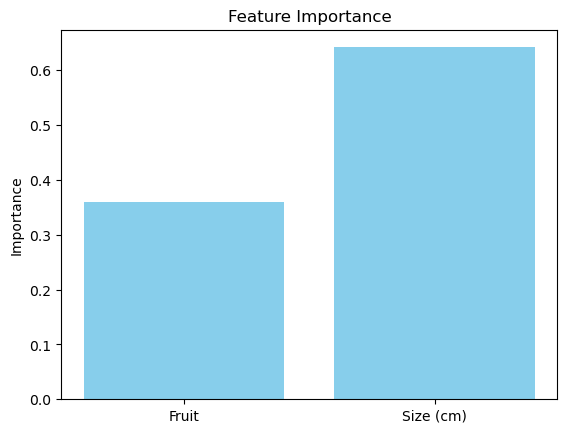

In [10]:
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initializing the classifier
fruitcolor_model_smote = RandomForestClassifier(random_state=42)

# Training the Random Forest model on the balanced dataset
fruitcolor_model_smote.fit(X_train_smote, y_train_smote)

# Getting feature importance from the trained model
importances = fruitcolor_model_smote.feature_importances_

# Assigning feature names
feature_names = ["Fruit", "Size (cm)"]

# Displaying feature importance
for feature, importance in zip(feature_names, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")
    
plt.bar(feature_names, importances, color="skyblue")
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.show()

In [11]:
# Making predictions with New fruit (nfruit) details
nfruit = [[0, 8]]  # Fruit = 0 (Green), Size = 8 cm

# Predicting the color (1 = Red, 0 = Green)
predicted_color = fruitcolor_model_smote.predict(nfruit)

# Interpreting and displaying the result
color_name = "Red" if predicted_color[0] == 1 else "Green"
print(f"The predicted color for the fruit is: {color_name}")

The predicted color for the fruit is: Red


Confusion Matrix (after SMOTE):


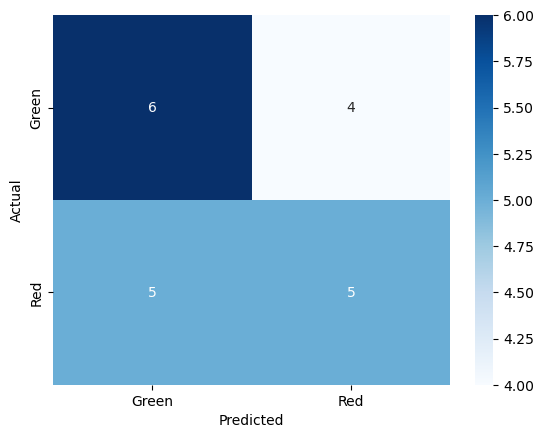


Classification Report (after SMOTE):
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.56      0.50      0.53        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



In [12]:
# Testing the model's performance on the test data
y_pred_smote = fruitcolor_model_smote.predict(X_test)

# Evaluating the model
print("Confusion Matrix (after SMOTE):")
cm = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Green", "Red"], yticklabels=["Green", "Red"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("\nClassification Report (after SMOTE):")
print(classification_report(y_test, y_pred_smote))

In [13]:
# Optimizing the model with Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(fruitcolor_model_smote, X, y, cv=4, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores):.2f} ± {np.std(scores):.2f}")

print(f"\nBest fruitcolor_model Accuracy is: {np.mean(scores):.2f}")

Cross-Validation Accuracy: 0.59 ± 0.06

Best fruitcolor_model Accuracy is: 0.59


In [14]:
# Saving the cross-validated model to a file

import joblib

joblib.dump(fruitcolor_model_smote, "fruitcolor_model_smote.pkl")
print("Cross-validated model saved as 'fruitcolor_model_smote.pkl'")

Cross-validated model saved as 'fruitcolor_model_smote.pkl'
